# Name : Vishal Soni
# Lets Grow More 
# Stock Market Prediction Using LSTM

In [39]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline
from pandas_profiling import ProfileReport

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [41]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

In [42]:
profile.to_widgets()


In [43]:
df_stock = df['Close']
df_stock.shape

(2035,)

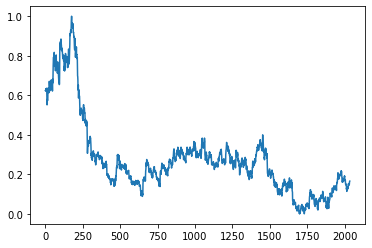

In [44]:
plt.plot(df_close)

# Normalization Using MinMaxScaler

In [45]:
scaler = MinMaxScaler(feature_range = (0,1))
df_stock = scaler.fit_transform(np.array(df_stock).reshape(-1,1))
df_stock

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

# Splitting the data into train and test sets.

In [46]:
training_size = int(len(df_stock) * 0.75)
test_size = len(df_stock) - training_size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]

In [47]:
def create_dstock(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [48]:
time_step = 100
x_train, y_train = create_dstock(train_data, time_step)
x_test, y_test = create_dstock(test_data, time_step)

# Reshaping the input to be [samples, time steps, features] :-the requirement of LSTM

In [49]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Creating the LSTM model

In [50]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [51]:
model.summary()
Model: "sequential"

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


# Predicting and checking performance metrics

In [52]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 15s 364ms/step - loss: 0.0258 - val_loss: 0.0082
Epoch 2/100
23/23 [==============================] - 7s 324ms/step - loss: 0.0026 - val_loss: 9.4216e-04
Epoch 3/100
23/23 [==============================] - 8s 335ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 4/100
23/23 [==============================] - 7s 322ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 5/100
23/23 [==============================] - 8s 329ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 6/100
23/23 [==============================] - 7s 324ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 7/100
23/23 [==============================] - 8s 330ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 8/100
23/23 [==============================] - 7s 323ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 9/100
23/23 [==============================] - 7s 323ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/100
23/23 [==============================] - 8s 328ms/step - loss: 0.0010 - v

23/23 [==============================] - 7s 320ms/step - loss: 3.1318e-04 - val_loss: 3.2071e-04
Epoch 77/100
23/23 [==============================] - 8s 329ms/step - loss: 2.2538e-04 - val_loss: 2.3833e-04
Epoch 78/100
23/23 [==============================] - 7s 319ms/step - loss: 2.1657e-04 - val_loss: 2.7199e-04
Epoch 79/100
23/23 [==============================] - 7s 320ms/step - loss: 2.3383e-04 - val_loss: 1.8965e-04
Epoch 80/100
23/23 [==============================] - 8s 326ms/step - loss: 2.4019e-04 - val_loss: 3.0567e-04
Epoch 81/100
23/23 [==============================] - 7s 318ms/step - loss: 2.1239e-04 - val_loss: 2.3350e-04
Epoch 82/100
23/23 [==============================] - 8s 327ms/step - loss: 2.3045e-04 - val_loss: 3.0092e-04
Epoch 83/100
23/23 [==============================] - 8s 331ms/step - loss: 2.2097e-04 - val_loss: 2.8953e-04
Epoch 84/100
23/23 [==============================] - 7s 320ms/step - loss: 2.0863e-04 - val_loss: 2.0689e-04
Epoch 85/100
23/23 [===

In [53]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [54]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculating RMSE performance metrics

In [55]:
math.sqrt(mean_squared_error(y_train, train_predict))

164.6837293427893

In [56]:
math.sqrt(mean_squared_error(y_test, test_predict))

105.96261669755877

# Plotting

In [57]:
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

In [58]:
testPredictPlot = np.empty_like(df_stock)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_stock) - 1, :] = test_predict

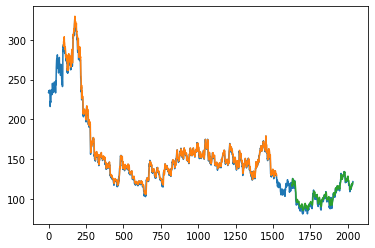

In [59]:
plt.plot(scaler.inverse_transform(df_stock))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [60]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [61]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape

(1, 302)

In [62]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [63]:
lst_output=[]
n_steps=301
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.01940359 0.02246732 0.03125    0.02348856 0.0249183  0.02144608
 0.04840686 0.04575163 0.03962418 0.03921569 0.04758987 0.04513889
 0.04166667 0.04125817 0.05044935 0.05555556 0.05494281 0.05412582
 0.0435049  0.04799837 0.05147059 0.05065359 0.03431373 0.04575163
 0.04187092 0.04554739 0.03941993 0.02716503 0.03125    0.05882353
 0.07148693 0.08721405 0.08986928 0.10498366 0.08905229 0.10355392
 0.10375817 0.12275327 0.10906863 0.09660948 0.1064134  0.10457516
 0.11049837 0.1127451  0.09803922 0.09987745 0.08925654 0.0747549
 0.08169935 0.08925654 0.09068627 0.08129085 0.08823529 0.08455882
 0.07945261 0.08374183 0.07781863 0.09824346 0.09089052 0.09007353
 0.09558824 0.06862745 0.06372549 0.0494281  0.04799837 0.04534314
 0.0443219  0.03941993 0.0379902  0.04656863 0.05085784 0.07209967
 0.06535948 0.07230392 0.07802288 0.07741013 0.06086601 0.06413399
 0.07046569 0.05412582 0.0498366  0.05167484 0.05330882 0.0435049
 0.02634804 0.02410131 0.02961601 0.01960784 0.02961

2 day output [[0.1712721]]
3 day input [0.02348856 0.0249183  0.02144608 0.04840686 0.04575163 0.03962418
 0.03921569 0.04758987 0.04513889 0.04166667 0.04125817 0.05044935
 0.05555556 0.05494281 0.05412582 0.0435049  0.04799837 0.05147059
 0.05065359 0.03431373 0.04575163 0.04187092 0.04554739 0.03941993
 0.02716503 0.03125    0.05882353 0.07148693 0.08721405 0.08986928
 0.10498366 0.08905229 0.10355392 0.10375817 0.12275327 0.10906863
 0.09660948 0.1064134  0.10457516 0.11049837 0.1127451  0.09803922
 0.09987745 0.08925654 0.0747549  0.08169935 0.08925654 0.09068627
 0.08129085 0.08823529 0.08455882 0.07945261 0.08374183 0.07781863
 0.09824346 0.09089052 0.09007353 0.09558824 0.06862745 0.06372549
 0.0494281  0.04799837 0.04534314 0.0443219  0.03941993 0.0379902
 0.04656863 0.05085784 0.07209967 0.06535948 0.07230392 0.07802288
 0.07741013 0.06086601 0.06413399 0.07046569 0.05412582 0.0498366
 0.05167484 0.05330882 0.0435049  0.02634804 0.02410131 0.02961601
 0.01960784 0.02961601 0.

5 day output [[0.17557263]]
6 day input [0.04840686 0.04575163 0.03962418 0.03921569 0.04758987 0.04513889
 0.04166667 0.04125817 0.05044935 0.05555556 0.05494281 0.05412582
 0.0435049  0.04799837 0.05147059 0.05065359 0.03431373 0.04575163
 0.04187092 0.04554739 0.03941993 0.02716503 0.03125    0.05882353
 0.07148693 0.08721405 0.08986928 0.10498366 0.08905229 0.10355392
 0.10375817 0.12275327 0.10906863 0.09660948 0.1064134  0.10457516
 0.11049837 0.1127451  0.09803922 0.09987745 0.08925654 0.0747549
 0.08169935 0.08925654 0.09068627 0.08129085 0.08823529 0.08455882
 0.07945261 0.08374183 0.07781863 0.09824346 0.09089052 0.09007353
 0.09558824 0.06862745 0.06372549 0.0494281  0.04799837 0.04534314
 0.0443219  0.03941993 0.0379902  0.04656863 0.05085784 0.07209967
 0.06535948 0.07230392 0.07802288 0.07741013 0.06086601 0.06413399
 0.07046569 0.05412582 0.0498366  0.05167484 0.05330882 0.0435049
 0.02634804 0.02410131 0.02961601 0.01960784 0.02961601 0.04575163
 0.05923203 0.06678922 0

8 day output [[0.17960402]]
9 day input [0.03921569 0.04758987 0.04513889 0.04166667 0.04125817 0.05044935
 0.05555556 0.05494281 0.05412582 0.0435049  0.04799837 0.05147059
 0.05065359 0.03431373 0.04575163 0.04187092 0.04554739 0.03941993
 0.02716503 0.03125    0.05882353 0.07148693 0.08721405 0.08986928
 0.10498366 0.08905229 0.10355392 0.10375817 0.12275327 0.10906863
 0.09660948 0.1064134  0.10457516 0.11049837 0.1127451  0.09803922
 0.09987745 0.08925654 0.0747549  0.08169935 0.08925654 0.09068627
 0.08129085 0.08823529 0.08455882 0.07945261 0.08374183 0.07781863
 0.09824346 0.09089052 0.09007353 0.09558824 0.06862745 0.06372549
 0.0494281  0.04799837 0.04534314 0.0443219  0.03941993 0.0379902
 0.04656863 0.05085784 0.07209967 0.06535948 0.07230392 0.07802288
 0.07741013 0.06086601 0.06413399 0.07046569 0.05412582 0.0498366
 0.05167484 0.05330882 0.0435049  0.02634804 0.02410131 0.02961601
 0.01960784 0.02961601 0.04575163 0.05923203 0.06678922 0.06229575
 0.06311275 0.0629085  0

12 day output [[0.18507196]]
13 day input [0.04125817 0.05044935 0.05555556 0.05494281 0.05412582 0.0435049
 0.04799837 0.05147059 0.05065359 0.03431373 0.04575163 0.04187092
 0.04554739 0.03941993 0.02716503 0.03125    0.05882353 0.07148693
 0.08721405 0.08986928 0.10498366 0.08905229 0.10355392 0.10375817
 0.12275327 0.10906863 0.09660948 0.1064134  0.10457516 0.11049837
 0.1127451  0.09803922 0.09987745 0.08925654 0.0747549  0.08169935
 0.08925654 0.09068627 0.08129085 0.08823529 0.08455882 0.07945261
 0.08374183 0.07781863 0.09824346 0.09089052 0.09007353 0.09558824
 0.06862745 0.06372549 0.0494281  0.04799837 0.04534314 0.0443219
 0.03941993 0.0379902  0.04656863 0.05085784 0.07209967 0.06535948
 0.07230392 0.07802288 0.07741013 0.06086601 0.06413399 0.07046569
 0.05412582 0.0498366  0.05167484 0.05330882 0.0435049  0.02634804
 0.02410131 0.02961601 0.01960784 0.02961601 0.04575163 0.05923203
 0.06678922 0.06229575 0.06311275 0.0629085  0.06658497 0.07434641
 0.06944444 0.08088235

16 day output [[0.19055147]]
17 day input [0.05412582 0.0435049  0.04799837 0.05147059 0.05065359 0.03431373
 0.04575163 0.04187092 0.04554739 0.03941993 0.02716503 0.03125
 0.05882353 0.07148693 0.08721405 0.08986928 0.10498366 0.08905229
 0.10355392 0.10375817 0.12275327 0.10906863 0.09660948 0.1064134
 0.10457516 0.11049837 0.1127451  0.09803922 0.09987745 0.08925654
 0.0747549  0.08169935 0.08925654 0.09068627 0.08129085 0.08823529
 0.08455882 0.07945261 0.08374183 0.07781863 0.09824346 0.09089052
 0.09007353 0.09558824 0.06862745 0.06372549 0.0494281  0.04799837
 0.04534314 0.0443219  0.03941993 0.0379902  0.04656863 0.05085784
 0.07209967 0.06535948 0.07230392 0.07802288 0.07741013 0.06086601
 0.06413399 0.07046569 0.05412582 0.0498366  0.05167484 0.05330882
 0.0435049  0.02634804 0.02410131 0.02961601 0.01960784 0.02961601
 0.04575163 0.05923203 0.06678922 0.06229575 0.06311275 0.0629085
 0.06658497 0.07434641 0.06944444 0.08088235 0.07700163 0.0684232
 0.06781046 0.0629085  0.0

20 day output [[0.19594692]]
21 day input [0.05065359 0.03431373 0.04575163 0.04187092 0.04554739 0.03941993
 0.02716503 0.03125    0.05882353 0.07148693 0.08721405 0.08986928
 0.10498366 0.08905229 0.10355392 0.10375817 0.12275327 0.10906863
 0.09660948 0.1064134  0.10457516 0.11049837 0.1127451  0.09803922
 0.09987745 0.08925654 0.0747549  0.08169935 0.08925654 0.09068627
 0.08129085 0.08823529 0.08455882 0.07945261 0.08374183 0.07781863
 0.09824346 0.09089052 0.09007353 0.09558824 0.06862745 0.06372549
 0.0494281  0.04799837 0.04534314 0.0443219  0.03941993 0.0379902
 0.04656863 0.05085784 0.07209967 0.06535948 0.07230392 0.07802288
 0.07741013 0.06086601 0.06413399 0.07046569 0.05412582 0.0498366
 0.05167484 0.05330882 0.0435049  0.02634804 0.02410131 0.02961601
 0.01960784 0.02961601 0.04575163 0.05923203 0.06678922 0.06229575
 0.06311275 0.0629085  0.06658497 0.07434641 0.06944444 0.08088235
 0.07700163 0.0684232  0.06781046 0.0629085  0.0692402  0.0755719
 0.07781863 0.08088235 

23 day output [[0.19993994]]
24 day input [0.04187092 0.04554739 0.03941993 0.02716503 0.03125    0.05882353
 0.07148693 0.08721405 0.08986928 0.10498366 0.08905229 0.10355392
 0.10375817 0.12275327 0.10906863 0.09660948 0.1064134  0.10457516
 0.11049837 0.1127451  0.09803922 0.09987745 0.08925654 0.0747549
 0.08169935 0.08925654 0.09068627 0.08129085 0.08823529 0.08455882
 0.07945261 0.08374183 0.07781863 0.09824346 0.09089052 0.09007353
 0.09558824 0.06862745 0.06372549 0.0494281  0.04799837 0.04534314
 0.0443219  0.03941993 0.0379902  0.04656863 0.05085784 0.07209967
 0.06535948 0.07230392 0.07802288 0.07741013 0.06086601 0.06413399
 0.07046569 0.05412582 0.0498366  0.05167484 0.05330882 0.0435049
 0.02634804 0.02410131 0.02961601 0.01960784 0.02961601 0.04575163
 0.05923203 0.06678922 0.06229575 0.06311275 0.0629085  0.06658497
 0.07434641 0.06944444 0.08088235 0.07700163 0.0684232  0.06781046
 0.0629085  0.0692402  0.0755719  0.07781863 0.08088235 0.08843954
 0.09395425 0.09599673

27 day output [[0.20520894]]
28 day input [0.03125    0.05882353 0.07148693 0.08721405 0.08986928 0.10498366
 0.08905229 0.10355392 0.10375817 0.12275327 0.10906863 0.09660948
 0.1064134  0.10457516 0.11049837 0.1127451  0.09803922 0.09987745
 0.08925654 0.0747549  0.08169935 0.08925654 0.09068627 0.08129085
 0.08823529 0.08455882 0.07945261 0.08374183 0.07781863 0.09824346
 0.09089052 0.09007353 0.09558824 0.06862745 0.06372549 0.0494281
 0.04799837 0.04534314 0.0443219  0.03941993 0.0379902  0.04656863
 0.05085784 0.07209967 0.06535948 0.07230392 0.07802288 0.07741013
 0.06086601 0.06413399 0.07046569 0.05412582 0.0498366  0.05167484
 0.05330882 0.0435049  0.02634804 0.02410131 0.02961601 0.01960784
 0.02961601 0.04575163 0.05923203 0.06678922 0.06229575 0.06311275
 0.0629085  0.06658497 0.07434641 0.06944444 0.08088235 0.07700163
 0.0684232  0.06781046 0.0629085  0.0692402  0.0755719  0.07781863
 0.08088235 0.08843954 0.09395425 0.09599673 0.08660131 0.09027778
 0.08517157 0.0837418

In [64]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [65]:
df3 = df_stock.tolist()
df3.extend(lst_output)

In [66]:
len(df_stock)

2035

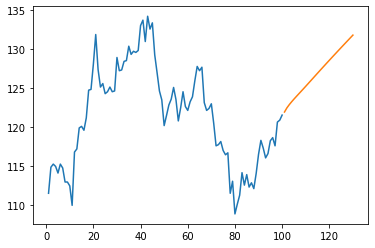

In [67]:
plt.plot(day_new, scaler.inverse_transform(df_stock[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))